### Name: Apurva Patel
### UNI: amp2365

## Setup

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
pp = pprint.PrettyPrinter(indent=4)
import warnings
warnings.filterwarnings("ignore")

# Part 1: Neural Network from scratch
For this part, you are not allowed to use any library other than numpy.

In this part, you will implement the forward pass and backward pass (i.e. the derivates of each
parameter wrt to the loss) with the network image uploaded.

*   The weight matrix for the hidden layer is W1 and has bias b1.
*   The weight matrix for the output layer is W2 and has bias b2.
*   Activation function is sigmoid for both hidden and output layer
*   Loss function is the Mean Squared Error (MSE) loss

Refer to the below dictionary for dimensions for each matrix


In [ ]:
np.random.seed(0) # don't change this
weights = {
'W1': np.random.randn(3, 2),
'b1': np.zeros(3),
'W2': np.random.randn(3),
'b2': 0,
}
X = np.random.rand(1000,2)
Y = np.random.randint(low=0, high=2, size=(1000,))

In [ ]:
#Sigmoid Function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [ ]:
#Implement the forward pass - Z2 and Y
def forward_propagation(X, weights):
    # Z1 -> output of the hidden layer before applying activation
    # H -> output of the  hidden layer after applying activation
    # Z2 -> output of the final layer before applying activation
    # Y -> output of the final layer after applying activation

    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)
    # Your code here
    Z2 = np.dot(H, weights['W2']) + weights['b2']
    Y = sigmoid(Z2)

    return Y, Z2, H, Z1

In [ ]:
# Implement the backward pass - dLdZ1, dLdW1, dLdb1
# Y_T are the ground truth labels
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]

    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/(2*N_points)) * np.sum(np.square(Y - Y_T))

    # back propagation
    dLdY = 1/N_points * (Y - Y_T)
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)

    ones = np.ones((1000))
    dLdb2 = np.dot(ones.T, dLdZ2)
    dLdH = np.dot(dLdZ2.reshape(-1,1), weights['W2'].reshape(-1,1).T)

    # Your code here

    dLdZ1 = np.multiply(dLdH, (sigmoid(Z1) * (1 - sigmoid(Z1))))
    dLdW1 = np.dot(dLdZ1.T, X)
    dLdb1 = np.dot(ones, dLdZ1)

    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }

    return gradients, L

In [ ]:
gradients, L = back_propagation(X, Y, weights)
print(L)

0.1332476222330792


In [ ]:
pp.pprint(gradients)

{   'W1': array([[ 0.00244596,  0.00262019],
       [-0.00030765, -0.00024188],
       [-0.00034768, -0.000372  ]]),
    'W2': array([0.02216011, 0.02433097, 0.01797174]),
    'b1': array([ 0.00492577, -0.00058023, -0.00065977]),
    'b2': 0.029249230265318688}


Your answers should be close to L = 0.133 and 'b1': array([ 0.00492, -0.000581, -0.00066]).

You will be graded based on your implementation and outputs for L, W1, W2 b1, and b2

# Part 2: Neural network to classify images: CIFAR-10

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes - airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

The train/test split is 50k/10k.

In [ ]:
from tensorflow.keras.datasets import cifar10 #Code to load data, do not change
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()

LABELS = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

170498071/170498071 [==============================] - 13s 0us/step


### 2.1 Plot 50 samples from each class/label from train set on a 10*5 subplot

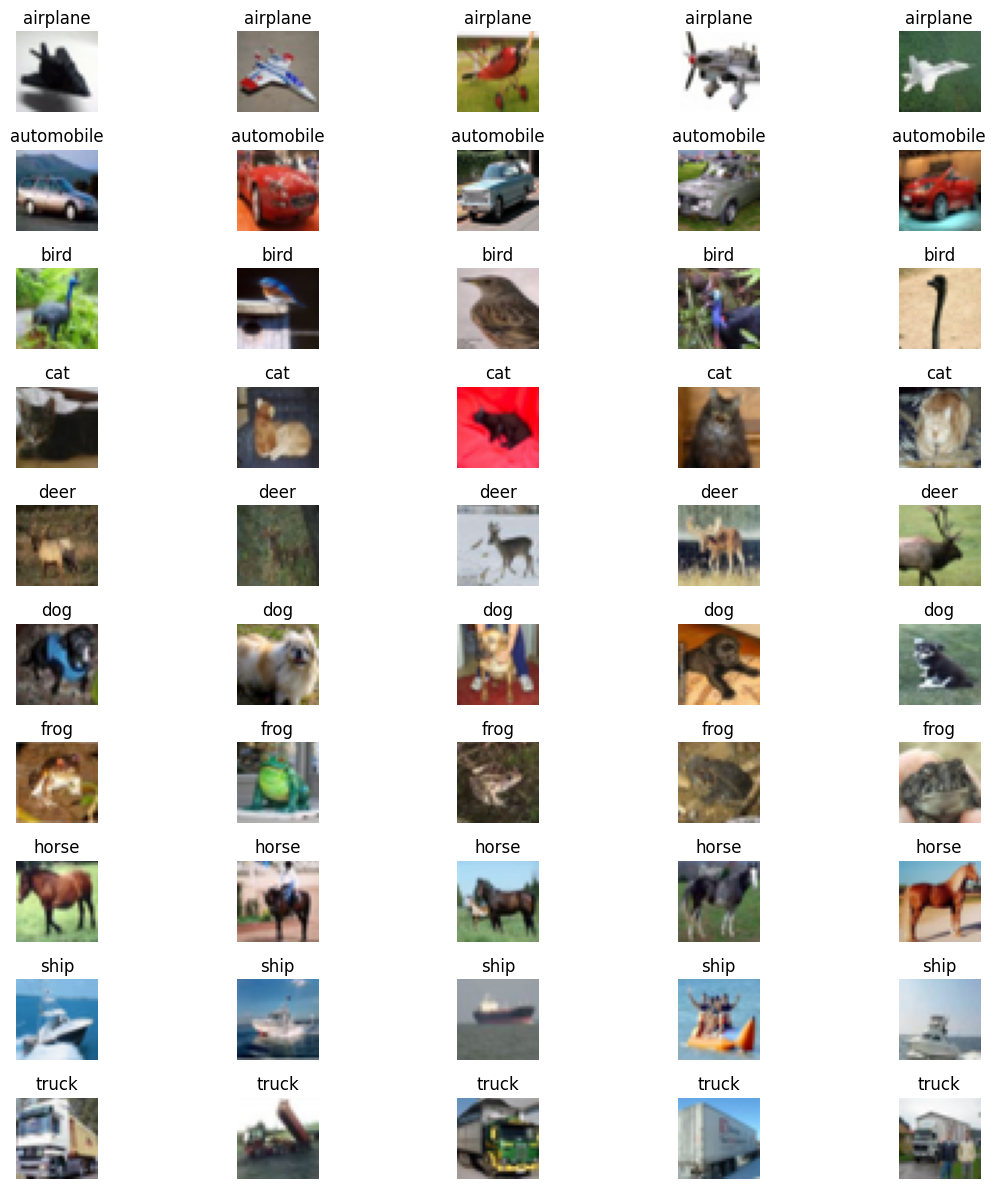

In [ ]:
#Your code here

class_indices = {i: [] for i in range(10)}
for i, label in enumerate(y_dev):
    class_indices[label[0]].append(i)

fig, axes = plt.subplots(10, 5, figsize=(12, 12))
for i in range(10):
    for j in range(5):
        idx = class_indices[i][j]
        axes[i, j].imshow(x_dev[idx])
        axes[i, j].set_title(LABELS[i])
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()


### 2.2 Preparing the dataset for NN

1) Print the shapes -  𝑥𝑑𝑒𝑣, 𝑦𝑑𝑒𝑣, 𝑥𝑡𝑒𝑠𝑡, 𝑦𝑡𝑒𝑠𝑡

2) Flatten the images into one-dimensional vectors and again print the shapes of  𝑥𝑑𝑒𝑣, 𝑥𝑡𝑒𝑠𝑡

3) Standardize the development and test sets.

4) One hot encode your labels

5) Train-test split your development set into train and validation sets (80:20 ratio).

In [ ]:
#Your code here
print("Shapes before preprocessing:")
print("x_dev shape:", x_dev.shape)
print("y_dev shape:", y_dev.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

Shapes before preprocessing:
x_dev shape: (50000, 32, 32, 3)
y_dev shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
#Your code here
x_dev_flat = x_dev.reshape(x_dev.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [ ]:
print("\nShapes after flattening:")
print("x_dev shape (flattened):", x_dev_flat.shape)
print("x_test shape (flattened):", x_test_flat.shape)


Shapes after flattening:
x_dev shape (flattened): (50000, 3072)
x_test shape (flattened): (10000, 3072)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
#Your code here
scaler = StandardScaler()
x_dev_scaled = scaler.fit_transform(x_dev_flat)
x_test_scaled = scaler.transform(x_test_flat)

In [ ]:
#Your code here
encoder = OneHotEncoder(sparse=False)
y_dev_encoded = encoder.fit_transform(y_dev)
y_test_encoded = encoder.transform(y_test)

In [ ]:
#Your code here
x_train, x_val, y_train, y_val = train_test_split(x_dev_scaled, y_dev_encoded, test_size=0.2, random_state=42)

print("\nShapes after train-test split:")
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)


Shapes after train-test split:
x_train shape: (40000, 3072)
y_train shape: (40000, 10)
x_val shape: (10000, 3072)
y_val shape: (10000, 10)


### 2.3 Build the feed forward network with the below specifications

First layer size = 128

hidden layer size = 64

last layer size = Figure this out from the data!

The last layer size is 10 as there are 10 classes in the dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

#Your code here
input_size = x_train.shape[1]
first_layer_size = 128
hidden_layer_size = 64
output_size = y_train.shape[1]

# the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(first_layer_size, activation='relu', input_shape=(input_size,)),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 2.4 Print out the model summary. Mention the number of parameters for each layer.

In [ ]:
#Your code here
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 402250 (1.53 MB)
Trainable params: 402250 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 2.5 Do you think the number of parameters is dependent on the image height and width?

- Yes, the number of parameters in a neural network is indirectly influenced (sort opf) by the image height and width.

- In a fully connected layer, each neuron connects to every neuron in the previous layer, resulting in a large number of parameters. Therefore, larger images with more pixels will lead to more parameters in the network.

- However, the direct dependency is on the number of neurons in each layer and the connections between them, rather than the specific dimensions of the image.

In [ ]:
#Your comments here: Wrote in markdown above

**Printing out your model's output on first train sample. This will confirm if your dimensions are correctly set up. The sum of this output should equal to 1.**

In [ ]:
#modify name of X_train based on your requirement

model.compile()
output = model.predict(x_train[0].reshape(1,-1))

print("Output: {:.2f}".format(sum(output[0])))

1/1 [==============================] - 1s 786ms/step
Output: 1.00


### 2.6 Using the right metric and  the right loss function, with Adam as the optimizer, train your model for 20 epochs.

In [ ]:
#Your code here
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)

print("\nTest Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/20
1250/1250 [==============================] - 8s 5ms/step - loss: 1.8277 - accuracy: 0.3670 - val_loss: 1.6556 - val_accuracy: 0.4169
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5710 - accuracy: 0.4466 - val_loss: 1.5855 - val_accuracy: 0.4391
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4656 - accuracy: 0.4819 - val_loss: 1.5413 - val_accuracy: 0.4611
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3996 - accuracy: 0.5053 - val_loss: 1.4827 - val_accuracy: 0.4824
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3403 - accuracy: 0.5274 - val_loss: 1.4949 - val_accuracy: 0.4868
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2928 - accuracy: 0.5427 - val_loss: 1.4569 - val_accuracy: 0.4885
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2469 - accuracy: 0.5594 - val_loss: 1.4566 - val_accuracy:

### 2.7 Plot the training curves as described below

#### 2.7.1 Display the train vs validation loss over each epoch


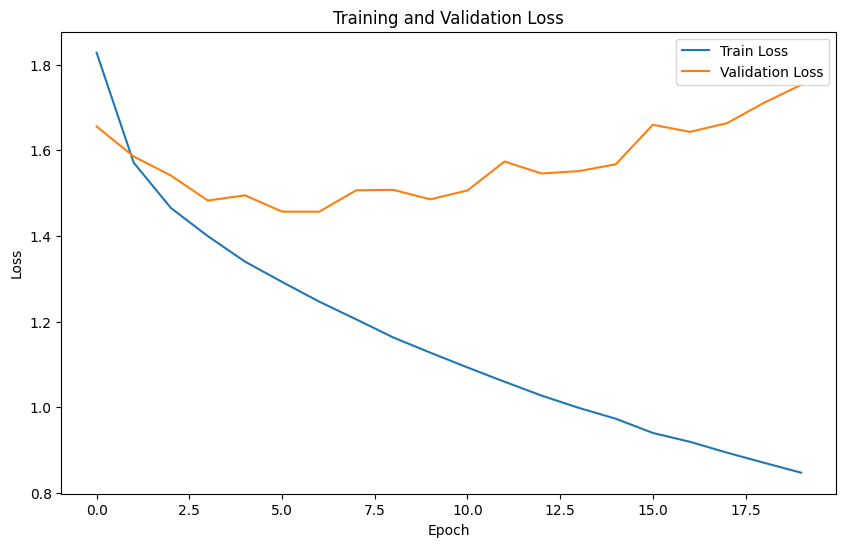

In [ ]:
#Your code here
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### 2.7.2 Display the train vs validation accuracy over each epoch

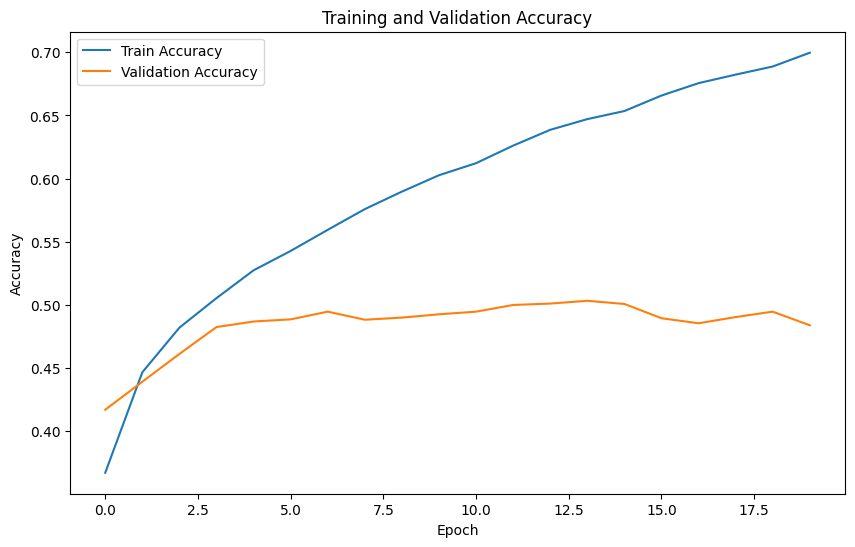

In [ ]:
#Your code here
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 2.8 Finally, report the metric chosen on test set

In [ ]:
#Your code here
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.4821000099182129


### 2.9 Plot the first 50 samples of test dataset on a 10*5 subplot and this time label the images with both the ground truth (GT) and predicted class (P). (Make sure you predict the class with the improved model)

2/2 [==============================] - 0s 8ms/step


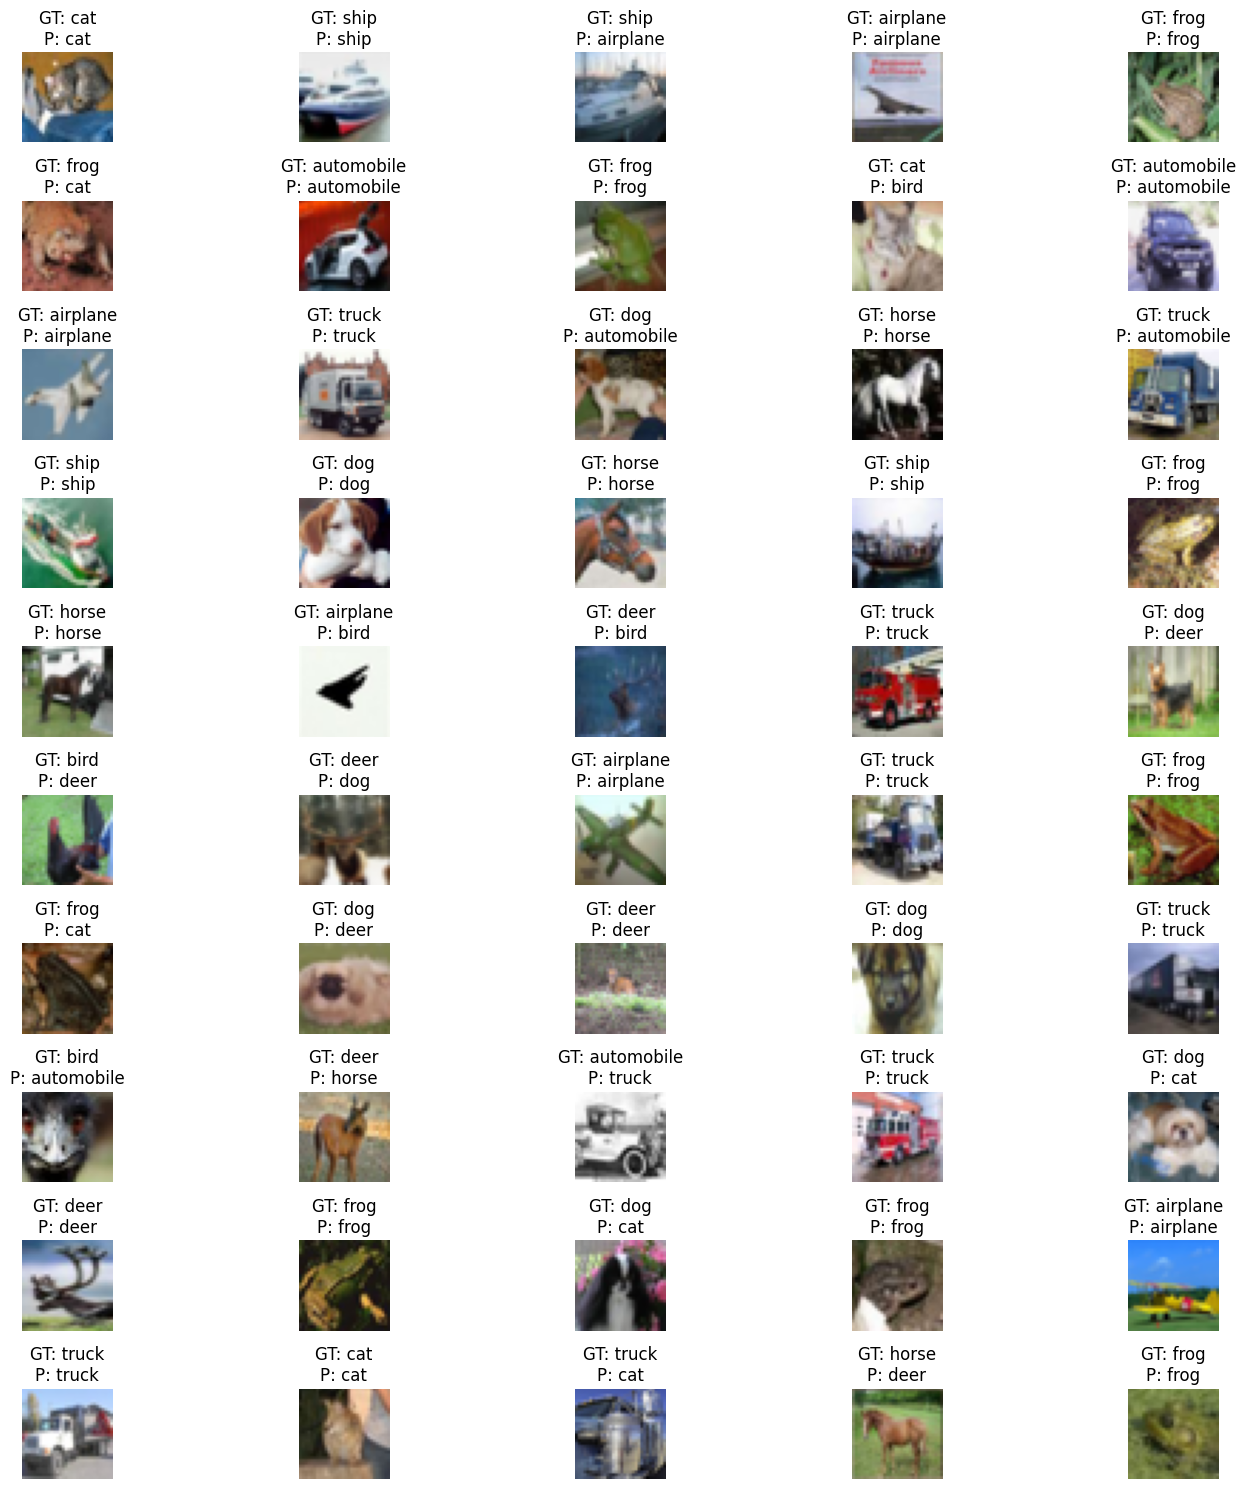

In [ ]:
#Your code here
predictions = model.predict(x_test_scaled[:50])
predicted_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=(15, 15))
for i in range(50):
    plt.subplot(10, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"GT: {LABELS[y_test[i][0]]}\nP: {LABELS[predicted_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Part 3 - Convolutional Neural Networks

In this part of the homework, we will build and train a classical convolutional neural network on the CIFAR Dataset

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [2]:
#Code to load the dataset - Do not change
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()
print("x_dev: {},y_dev: {},x_test: {},y_test: {}".format(x_dev.shape, y_dev.shape, x_test.shape, y_test.shape))

x_dev, x_test = x_dev.astype('float32'), x_test.astype('float32')
x_dev = x_dev/255.0
x_test = x_test/255.0


from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_dev, y_dev,test_size = 0.2, random_state = 42)

170498071/170498071 [==============================] - 7s 0us/step
x_dev: (50000, 32, 32, 3),y_dev: (50000, 1),x_test: (10000, 32, 32, 3),y_test: (10000, 1)


In [3]:
# OHE the labels for y
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [4]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)

print("Shape of x_test:", x_test.shape)

Shape of X_train: (40000, 32, 32, 3)
Shape of X_val: (10000, 32, 32, 3)
Shape of x_test: (10000, 32, 32, 3)


In [5]:
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

print("Shape of y_test:", y_test.shape)

Shape of y_train: (40000, 10)
Shape of y_val: (10000, 10)
Shape of y_test: (10000, 10)


### 3.1 We will be implementing one of the first CNN models put forward by Yann LeCunn, which is commonly referred to as LeNet-5. The network has the following layers:

1) 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1, 0 padding, ReLU activation

2) Maxpooling layer of 2x2

3) 2D convolutional layer with 16 filters, 5x5 kernel, stride of 1, 0 padding, ReLU activation

4) Maxpooling layer of 2x2

5) Flatten the convolution output to feed it into fully connected layers

6) A fully connected layer with 120 units, ReLU activation

7) A fully connected layer with 84 units, ReLU activation

8) The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)

In [6]:
#Your code here
num_classes=10

cnn = Sequential()

#1
cnn.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), padding='valid', activation='relu', input_shape=(32, 32, 3)))

# 2
cnn.add(MaxPool2D(pool_size=(2, 2)))

# 3
cnn.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), padding='valid', activation='relu'))

# 4
cnn.add(MaxPool2D(pool_size=(2, 2)))

# 5
cnn.add(Flatten())

# 6
cnn.add(Dense(120, activation='relu'))

# 7
cnn.add(Dense(84, activation='relu'))

# 8
cnn.add(Dense(10, activation='softmax'))

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### 3.2 Report the model summary

In [7]:
#Your code here
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

### 3.3 Model Training

1) Train the model for 20 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets.

2) Plot separate plots for:

* displaying train vs validation loss over each epoch
* displaying train vs validation accuracy over each epoch

3) Report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [8]:
#Your code here

history = cnn.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
1250/1250 [==============================] - 17s 8ms/step - loss: 1.6520 - accuracy: 0.3947 - val_loss: 1.4595 - val_accuracy: 0.4588
Epoch 2/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.3653 - accuracy: 0.5061 - val_loss: 1.3515 - val_accuracy: 0.5101
Epoch 3/20
1250/1250 [==============================] - 13s 11ms/step - loss: 1.2607 - accuracy: 0.5462 - val_loss: 1.2648 - val_accuracy: 0.5535
Epoch 4/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.1890 - accuracy: 0.5770 - val_loss: 1.2442 - val_accuracy: 0.5554
Epoch 5/20
1250/1250 [==============================] - 13s 10ms/step - loss: 1.1174 - accuracy: 0.6039 - val_loss: 1.2069 - val_accuracy: 0.5725
Epoch 6/20
1250/1250 [==============================] - 20s 16ms/step - loss: 1.0641 - accuracy: 0.6223 - val_loss: 1.2499 - val_accuracy: 0.5701
Epoch 7/20
1250/1250 [==============================] - 12s 10ms/step - loss: 1.0162 - accuracy: 0.6383 - val_loss: 1.1208 - v

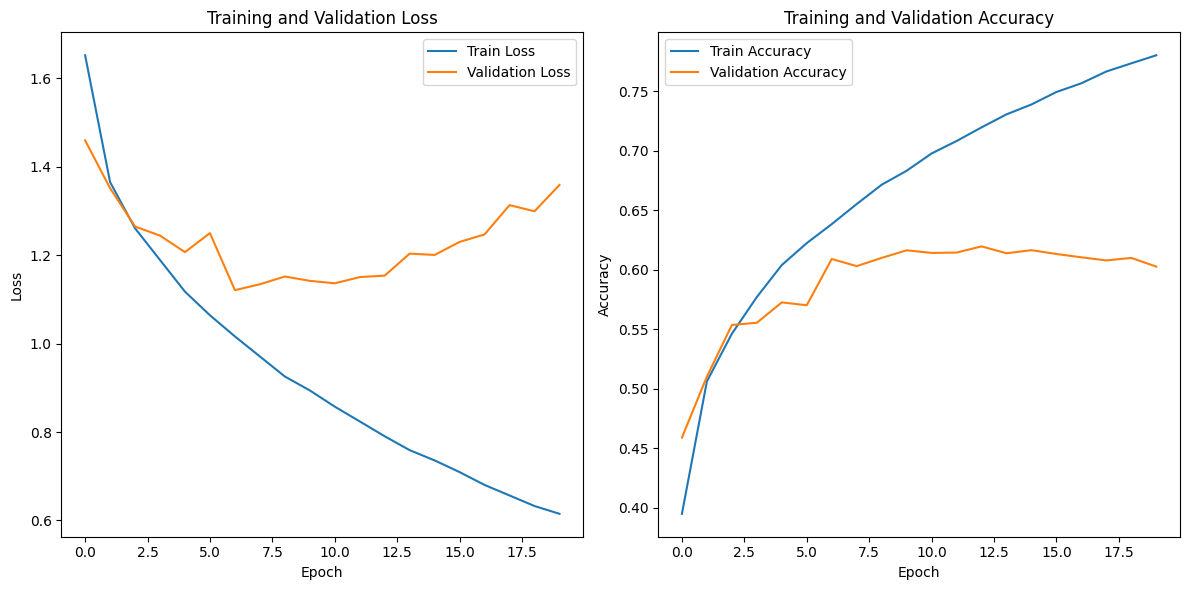

In [12]:
#Your code here

# train vs. valid loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# train vs. valid accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# y_test_encoded = to_categorical(y_test, num_classes=10)

In [ ]:
# y_test_encoded.shape

In [13]:
#Your code here
test_loss, test_accuracy = cnn.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 1.4129 - accuracy: 0.5915
Test Loss: 1.4128663539886475
Test Accuracy: 0.5914999842643738


### 3.4 Overfitting
1) To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.3. Train the model again for 20 epochs. Report model performance on test set.

Plot separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch

2) This time, let's apply a batch normalization after every hidden layer, train the model for 20 epochs, report model performance on test set as above.

Plot separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch

3) Compare batch normalization technique with the original model and with dropout, which technique do you think helps with overfitting better?

In [14]:
from tensorflow.keras.layers import Dropout, BatchNormalization, MaxPooling2D

#### 3.4.1 Dropout

In [15]:
#Your code here
cnn_dropout = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_dropout.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

cnn_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [16]:
dropout_history = cnn_dropout.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
1250/1250 [==============================] - 16s 9ms/step - loss: 1.6119 - accuracy: 0.4065 - val_loss: 1.2999 - val_accuracy: 0.5349
Epoch 2/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.2525 - accuracy: 0.5529 - val_loss: 1.1198 - val_accuracy: 0.6108
Epoch 3/20
1250/1250 [==============================] - 12s 10ms/step - loss: 1.1111 - accuracy: 0.6087 - val_loss: 1.0343 - val_accuracy: 0.6196
Epoch 4/20
1250/1250 [==============================] - 12s 10ms/step - loss: 1.0175 - accuracy: 0.6402 - val_loss: 0.9230 - val_accuracy: 0.6742
Epoch 5/20
1250/1250 [==============================] - 12s 10ms/step - loss: 0.9517 - accuracy: 0.6675 - val_loss: 0.8948 - val_accuracy: 0.6859
Epoch 6/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.9018 - accuracy: 0.6851 - val_loss: 0.8718 - val_accuracy: 0.6935
Epoch 7/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.8551 - accuracy: 0.6995 - val_loss: 0.9440 - val

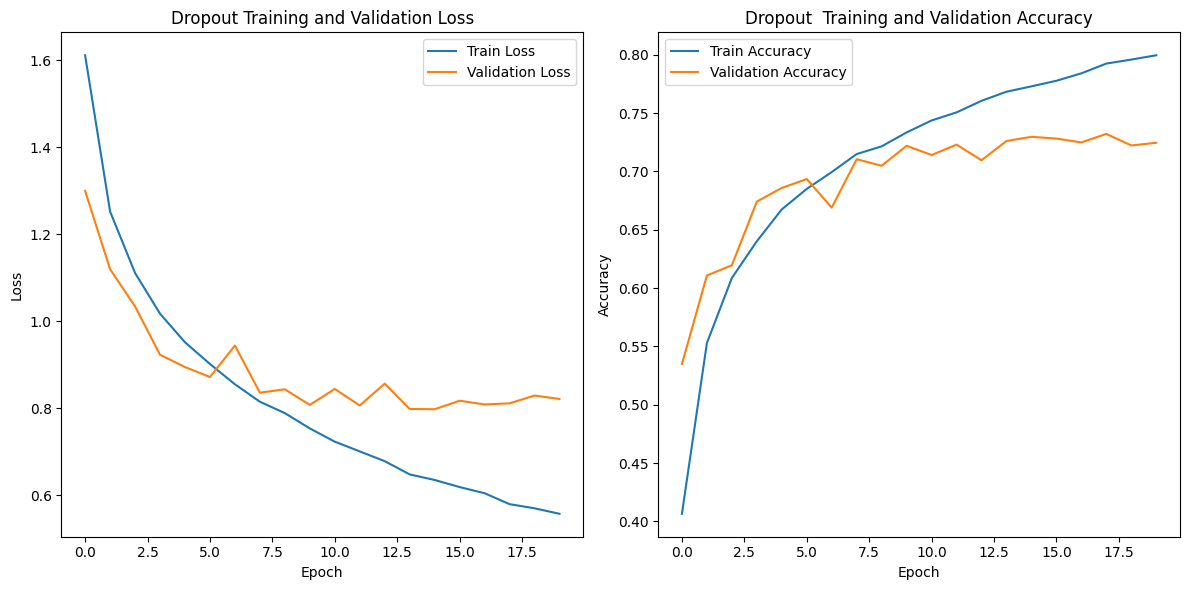

In [17]:
#Your code here

# train vs val loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(dropout_history.history['loss'], label='Train Loss')
plt.plot(dropout_history.history['val_loss'], label='Validation Loss')
plt.title('Dropout Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# train vs val accuracy
plt.subplot(1, 2, 2)
plt.plot(dropout_history.history['accuracy'], label='Train Accuracy')
plt.plot(dropout_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Dropout  Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
#Your code here
test_loss, test_accuracy = cnn_dropout.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 5s 15ms/step - loss: 0.8237 - accuracy: 0.7254
Test Loss: 0.823741614818573
Test Accuracy: 0.7253999710083008


#### 3.4.2 Batch Normalization

In [18]:
#Your code here

cnn_bn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

cnn_bn.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

cnn_bn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                      

In [19]:
#Your code here
bn_history = cnn_bn.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
1250/1250 [==============================] - 21s 14ms/step - loss: 1.3839 - accuracy: 0.5096 - val_loss: 1.7182 - val_accuracy: 0.4506
Epoch 2/20
1250/1250 [==============================] - 12s 10ms/step - loss: 1.0174 - accuracy: 0.6414 - val_loss: 1.1658 - val_accuracy: 0.5826
Epoch 3/20
1250/1250 [==============================] - 14s 11ms/step - loss: 0.8622 - accuracy: 0.6986 - val_loss: 1.1748 - val_accuracy: 0.5976
Epoch 4/20
1250/1250 [==============================] - 13s 11ms/step - loss: 0.7618 - accuracy: 0.7347 - val_loss: 0.9241 - val_accuracy: 0.6810
Epoch 5/20
1250/1250 [==============================] - 14s 11ms/step - loss: 0.6756 - accuracy: 0.7643 - val_loss: 0.9059 - val_accuracy: 0.6902
Epoch 6/20
1250/1250 [==============================] - 12s 10ms/step - loss: 0.6098 - accuracy: 0.7848 - val_loss: 1.2568 - val_accuracy: 0.6013
Epoch 7/20
1250/1250 [==============================] - 15s 12ms/step - loss: 0.5458 - accuracy: 0.8081 - val_loss: 1.0013 -

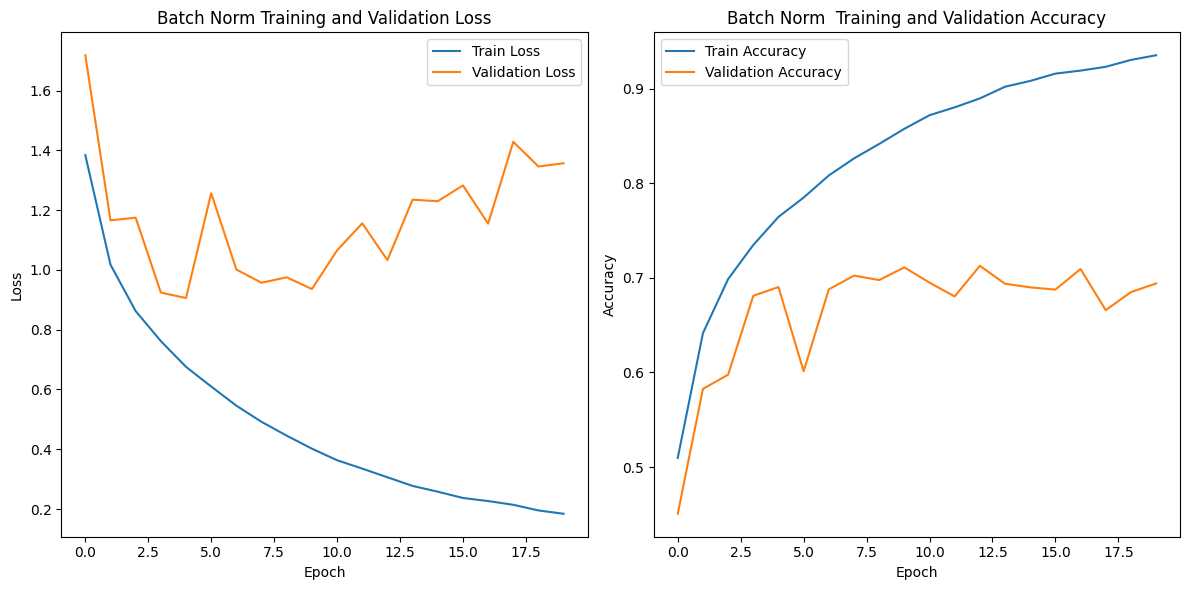

In [20]:
#Your code here

# train vs val loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(bn_history.history['loss'], label='Train Loss')
plt.plot(bn_history.history['val_loss'], label='Validation Loss')
plt.title('Batch Norm Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# train vs val accuracy
plt.subplot(1, 2, 2)
plt.plot(bn_history.history['accuracy'], label='Train Accuracy')
plt.plot(bn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Batch Norm  Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
test_loss, test_accuracy = cnn_bn.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 5s 14ms/step - loss: 1.3582 - accuracy: 0.6933
Test Loss: 1.358229637145996
Test Accuracy: 0.6933000087738037


**Dropout Model:**
- Dropout regularization seems to be the most effective in reducing overfitting, as indicated by the higher test accuracy and lower test loss compared to the original model.

**Batch Normalization Model:**
- While batch normalization helps to some extent, it does not perform as well as dropout in mitigating overfitting, as the test accuracy is lower compared to the dropout model.

SO for me Droput performed better than Batch Normalization.

In [26]:
!jupyter nbconvert --to pdf /content/AML_HW4_Questions_3.ipynb

[NbConvertApp] Converting notebook /content/AML_HW4_Questions_3.ipynb to pdf
[NbConvertApp] Support files will be in AML_HW4_Questions_3_files/
[NbConvertApp] Making directory ./AML_HW4_Questions_3_files
[NbConvertApp] Making directory ./AML_HW4_Questions_3_files
[NbConvertApp] Making directory ./AML_HW4_Questions_3_files
[NbConvertApp] Making directory ./AML_HW4_Questions_3_files
[NbConvertApp] Making directory ./AML_HW4_Questions_3_files
[NbConvertApp] Making directory ./AML_HW4_Questions_3_files
[NbConvertApp] Making directory ./AML_HW4_Questions_3_files
[NbConvertApp] Writing 104848 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1559360 bytes to /content/AML_HW4_Questions_3.pdf


In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

!pip install pypandoc

In [25]:
!jupyter nbconvert AML_HW4_Questions_3.ipynb --to latex


[NbConvertApp] Converting notebook AML_HW4_Questions_3.ipynb to latex
[NbConvertApp] Support files will be in AML_HW4_Questions_3_files/
[NbConvertApp] Making directory AML_HW4_Questions_3_files
[NbConvertApp] Making directory AML_HW4_Questions_3_files
[NbConvertApp] Making directory AML_HW4_Questions_3_files
[NbConvertApp] Making directory AML_HW4_Questions_3_files
[NbConvertApp] Making directory AML_HW4_Questions_3_files
[NbConvertApp] Making directory AML_HW4_Questions_3_files
[NbConvertApp] Making directory AML_HW4_Questions_3_files
[NbConvertApp] Writing 104848 bytes to AML_HW4_Questions_3.tex
